## Importações

In [1]:
import regex as re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-bright')

Ler todos arquivos da Web of Science:

In [2]:
dados1 = pd.read_excel('data/1-1000.xls')
dados2 = pd.read_excel('data/1001-2000.xls')
dados3 = pd.read_excel('data/2001-3000.xls')
dados4 = pd.read_excel('data/3001-4000.xls')
dados5 = pd.read_excel('data/4001-5000.xls')
dados6 = pd.read_excel('data/5001-6000.xls')
dados7 = pd.read_excel('data/6001-7000.xls')
dados8 = pd.read_excel('data/7001-8000.xls')
dados9 = pd.read_excel('data/8001-9000.xls')
dados10 = pd.read_excel('data/9001-10000.xls')

Concatenar todos arquivos:

In [3]:
dados_total = pd.concat([dados1, dados2, dados3, dados4, dados5, dados6, dados7, dados8, dados9, dados10], ignore_index=True)
dados_total['Abstract'] = dados_total['Abstract'].astype(str)

In [4]:
print(dados_total['Abstract'])

0       The article aims to describe the problem relat...
1       Microplastic pollution is a global crisis. Thi...
2       The contamination of microplastics in aquatic ...
3       The increasing demand for plastic in our daily...
4       Microplastic (<5 mm) pollution has been docume...
                              ...                        
9995    Microplastics and also nanoplastics are tiny p...
9996    Polystyrene (PS) is selected as a representati...
9997    Plastic microbeads are often added to personal...
9998    The nature of micro- and nanoplastics and thei...
9999    The degradation of plastic debris may result i...
Name: Abstract, Length: 10000, dtype: object


In [5]:
# Defining plastic types to search for
plastics = {'PET', 'PS', 'PVC', 'PP', 'HDPE', 'LDPE'} # Add more plastics as needed

In [6]:
def count_plastic_mentions(abstract):
    plastic_counts = {plastic: 0 for plastic in plastics}
    for plastic in plastics:
        pattern = rf'\b{plastic}\b'
        count = len(re.findall(pattern, abstract, flags=re.IGNORECASE))
        plastic_counts[plastic] += count
    return plastic_counts

plastic_counts_list = dados_total['Abstract'].apply(count_plastic_mentions)

# Summing up counts across all abstracts
total_plastic_counts = {plastic: sum(plastic_counts[plastic] for plastic_counts in plastic_counts_list) for plastic in plastics}

print("Total counts of plastic mentions:")
print(total_plastic_counts)

Total counts of plastic mentions:
{'PET': 1225, 'PS': 2520, 'PVC': 878, 'LDPE': 340, 'PP': 1241, 'HDPE': 255}


Ótimo, vamos então finalizar o código, agora salvando as ocorrências encontradas.

C:\Users\marcos220057\AppData\Local\Temp\ipykernel_12992\1793309290.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(total_plastic_counts.keys(),fontsize = 14)


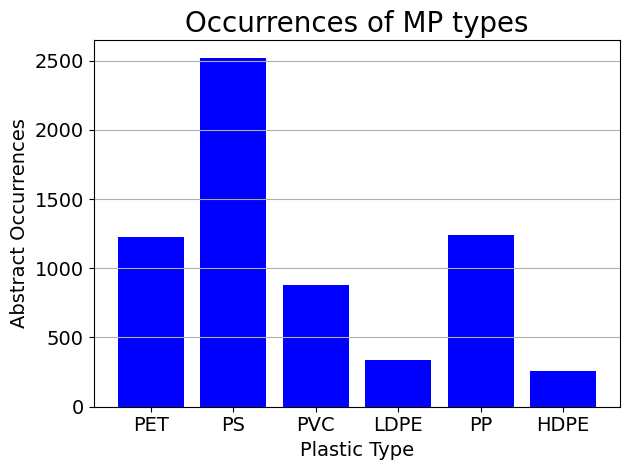

In [7]:
fig, ax = plt.subplots(1,1)
ax.bar(total_plastic_counts.keys(), total_plastic_counts.values(), color = 'blue')
ax.set_xlabel('Plastic Type', fontsize = 14)
ax.set_ylabel('Abstract Occurrences', fontsize = 14)
ax.set_title('Occurrences of MP types', fontsize = 20)
ax.set_xticklabels(total_plastic_counts.keys(),fontsize = 14)
ax.grid('- -', axis = 'y')
plt.yticks(fontsize=14) 
plt.tight_layout()

plt.savefig('results/types.png', dpi = 200)

In [8]:
def store_plastic_years(abstract, year):
    plastic_years = {plastic: [] for plastic in plastics}
    for plastic in plastics:
        pattern = rf'\b{plastic}\b'
        matches = re.finditer(pattern, abstract, flags=re.IGNORECASE)
        for match in matches:
            plastic_years[plastic].append(year)
    return plastic_years


plastic_years_list = []
for idx, row in dados_total.iterrows():
    abstract = row['Abstract']
    year = row['Publication Year']
    plastic_years_list.append(store_plastic_years(abstract, year))

# Summing up occurrences of each plastic type across all years
total_plastic_years = {plastic: sum((plastic_years[plastic] for plastic_years in plastic_years_list), []) for plastic in plastics}

plastic_timeline = {}

for plastic in total_plastic_years.keys():
    plastic_timeline[plastic] = [[], []]
    for year in list(range(2015, 2024)):
        plastic_timeline[plastic][0].append(year)
        plastic_timeline[plastic][1].append(total_plastic_years[plastic].count(year))

In [9]:
plastic_timeline

{'PET': [[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
  [1, 2, 13, 35, 56, 105, 234, 306, 339]],
 'PS': [[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
  [6, 10, 55, 27, 144, 262, 392, 563, 770]],
 'PVC': [[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
  [3, 8, 1, 12, 44, 150, 85, 220, 250]],
 'LDPE': [[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
  [0, 6, 3, 4, 30, 16, 47, 83, 113]],
 'PP': [[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
  [2, 8, 18, 31, 52, 119, 222, 288, 365]],
 'HDPE': [[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
  [0, 2, 3, 2, 17, 15, 44, 94, 53]]}

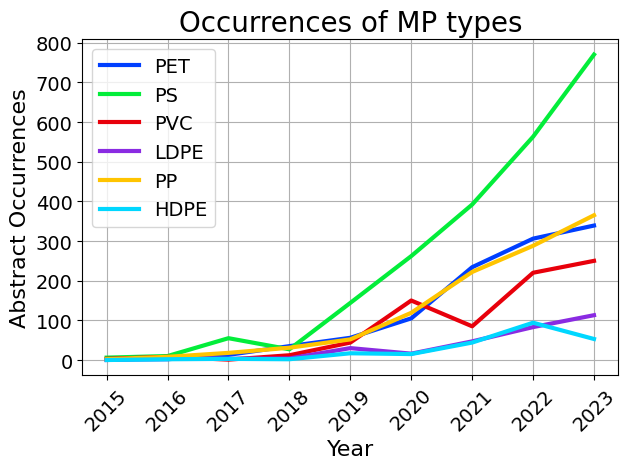

In [10]:
fig, ax = plt.subplots(1,1)
for plastic in plastics:
    ax.plot(plastic_timeline[plastic][0],plastic_timeline[plastic][1], label = plastic, linewidth = 3)

ax.set_xlabel('Year', fontsize = 16)
ax.set_ylabel('Abstract Occurrences', fontsize = 16)
ax.set_title('Occurrences of MP types', fontsize = 20)
ax.set_xticks(list(range(2015, 2024)))
ax.legend(fontsize = 14)

ax.set_xticklabels(list(range(2015, 2024)),fontsize = 14,rotation=45)
plt.yticks(fontsize=14) 
ax.grid('- -')
plt.tight_layout()

plt.savefig('results/types_timeline.png', dpi = 200)

In [19]:
colors = ['#FFD700', '#FF69B4', '#00FFFF', '#FFA500', '#00FF00', '#FF00FF']

C:\Users\marcos220057\AppData\Local\Temp\ipykernel_12992\2114030053.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(total_plastic_counts.keys(),fontsize = 14)


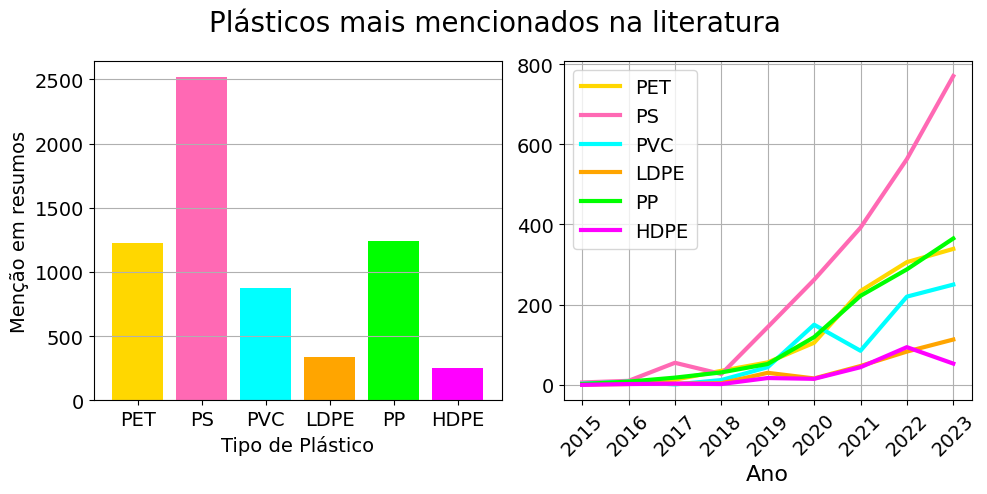

In [24]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize = (10, 5))
ax1.bar(total_plastic_counts.keys(), total_plastic_counts.values(), color = colors)
ax1.set_xlabel('Tipo de Plástico', fontsize = 14)
ax1.set_ylabel('Menção em resumos', fontsize = 14)
ax1.set_xticklabels(total_plastic_counts.keys(),fontsize = 14)
ax1.grid('- -', axis = 'y')
ax1.tick_params(axis='y', labelsize=14)

u=0
for plastic in plastics:
    ax2.plot(plastic_timeline[plastic][0],plastic_timeline[plastic][1], label = plastic, linewidth = 3, color = colors[u])
    u+=1

ax2.set_xlabel('Ano', fontsize = 16)
ax2.set_xticks(list(range(2015, 2024)))
ax2.legend(fontsize = 14)

ax2.set_xticklabels(list(range(2015, 2024)),fontsize = 14,rotation=45)
ax2.tick_params(axis='y', labelsize=14)
ax2.grid('- -')
fig.suptitle("Plásticos mais mencionados na literatura", fontsize =20)

plt.tight_layout()

plt.savefig('results/plasticos.png', dpi = 200)

# Detection Methods

### Listing all variations that might show up:

In [11]:
FTIR = "\\b([Ff][Tt]-?[Ii][Rr](\\b|-))|([Ff]ourier(\s|-)[Tt]ransform\s[Ii]nfrared)\\b"

RAMAN = "(\\b|-)[Rr][Aa][Mm][Aa][Nn](\\b|-)"

SEM = "(\\b|-)SEM|[Ss]canning\s[Ee]lectron\s[Mm]icroscop(y|e)\\b"

TEM = "(\\b|-)TEM|[Tr]ansmission\s[Ee]lectron\s[Mm]icroscop(y|e)\\b"

AFM = "(\\b|-)AFM|[Aa]tomic\s[Ff]orce\s[Mm]icroscop(y|e)\\b"

CLSM = "\\b[Cc]onfocal|CLSM|LCSM\\b"

PLM = "\\bPLM|[Pp]olarized\s[Ll]ight\s[Mm]icroscop(y|e)|[Pp]olirized\\b"

FM = "\\b([Ee]pi)?[Ff]luorescen(ce|t)\s[Mm]icroscop(e|y)\\b"

LIGHT = "\\b[Ss]tereoscopic|[Oo]ptical\s[Mm]icroscop(e|y)\\b"

tecniques = ['FTIR', 'Raman', 'SEM', 'TEM', 'AFM', 'CLSM', 'PLM', 'FM', 'OPTICAL']

tecnique_patterns = [FTIR, RAMAN, SEM, TEM, AFM, CLSM, PLM, FM, LIGHT]

In [12]:
sentence = "testando FTIR pra ver se Ft-IR aparece de Todas as formas Fourier Transform Infrared e tambem micro-FTIR e FTIR-ATR" 
print('TESTE: 5')
print('Achou:',len(re.findall(FTIR, sentence, flags=re.IGNORECASE )))
print()
print()
sentence = "Testando Raman e tambem micro-RAMAN ou micro-raman ou mesmo RAMAN-qualquercoisa e efeito teste-Raman-aqui"
print('TESTE: 5')
print('Achou:',len(re.findall(RAMAN, sentence, flags=re.IGNORECASE )))
print()
print()

TESTE: 5
Achou: 5


TESTE: 5
Achou: 5




In [13]:
def count_tec_mentions(abstract):
    tec_counts = {tec: 0 for tec in tecniques}
    u =0
    for pattern in tecnique_patterns:
        count = len(re.findall(pattern, abstract, flags=re.IGNORECASE))
        tec_counts[tecniques[u]] += count
        u +=1
    return tec_counts

tec_counts_list = dados_total['Abstract'].apply(count_tec_mentions)

# Summing up counts across all abstracts
total_tec_counts = {tec: sum(tec_counts[tec] for tec_counts in tec_counts_list) for tec in tecniques}

print("Total counts of tecnique mentions:")
print(total_tec_counts)

Total counts of tecnique mentions:
{'FTIR': 1741, 'Raman': 797, 'SEM': 883, 'TEM': 1308, 'AFM': 52, 'CLSM': 75, 'PLM': 11, 'FM': 112, 'OPTICAL': 83}


C:\Users\marcos220057\AppData\Local\Temp\ipykernel_12992\4048817149.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(tecniques,fontsize = 14,rotation=90)


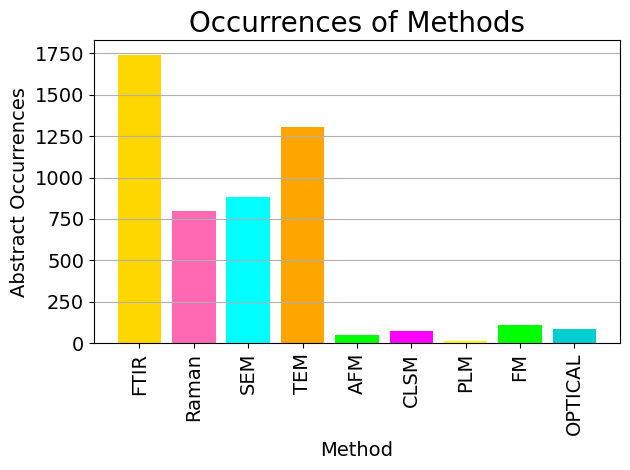

In [14]:
colors = ['#FFD700', '#FF69B4', '#00FFFF', '#FFA500', '#00FF00', '#FF00FF', '#FFFF00', '#00FF00', '#00CED1']

fig, ax = plt.subplots(1,1)
ax.bar(total_tec_counts.keys(), total_tec_counts.values(), color = colors)
ax.set_xlabel('Method', fontsize = 14)
ax.set_ylabel('Abstract Occurrences', fontsize = 14)
ax.set_title('Occurrences of Methods', fontsize = 20)
ax.set_xticklabels(tecniques,fontsize = 14,rotation=90)
ax.grid('- -', axis = 'y')
plt.yticks(fontsize=14) 
plt.tight_layout()
plt.savefig('results/methods.png', dpi = 200)

In [15]:
def count_tec_mentions(abstract):
    tec_counts = {tec: 0 for tec in tecniques}
    u =0
    for pattern in tecnique_patterns:
        count = len(re.findall(pattern, abstract, flags=re.IGNORECASE))
        tec_counts[tecniques[u]] += count
        u +=1
    return tec_counts

def store_tec_years(abstract, year):
    tec_years = {tec: [] for tec in tecniques}
    u=0
    for pattern in tecnique_patterns:
        matches = re.finditer(pattern, abstract, flags=re.IGNORECASE)
        for match in matches:
            tec_years[tecniques[u]].append(year)
        u+=1
    return tec_years


tec_years_list = []
for idx, row in dados_total.iterrows():
    abstract = row['Abstract']
    year = row['Publication Year']
    tec_years_list.append(store_tec_years(abstract, year))

# Summing up occurrences of each plastic type across all years
total_tec_years = {tec: sum((tec_years[tec] for tec_years in tec_years_list), []) for tec in tecniques}

tec_timeline = {}

for tec in total_tec_years.keys():
    tec_timeline[tec] = [[], []]
    for year in list(range(2015, 2024)):
        tec_timeline[tec][0].append(year)
        tec_timeline[tec][1].append(total_tec_years[tec].count(year))

In [16]:
tec_timeline

{'FTIR': [[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
  [11, 17, 50, 90, 105, 215, 270, 366, 430]],
 'Raman': [[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
  [9, 6, 15, 27, 38, 89, 112, 164, 247]],
 'SEM': [[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
  [2, 9, 21, 17, 44, 85, 138, 205, 257]],
 'TEM': [[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
  [10, 11, 26, 42, 73, 125, 153, 252, 275]],
 'AFM': [[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
  [0, 0, 0, 0, 2, 7, 9, 15, 15]],
 'CLSM': [[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
  [0, 0, 2, 3, 1, 15, 9, 17, 20]],
 'PLM': [[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
  [0, 0, 1, 0, 0, 1, 2, 3, 2]],
 'FM': [[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
  [0, 0, 3, 3, 7, 22, 14, 20, 25]],
 'OPTICAL': [[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
  [1, 1, 4, 2, 3, 9, 15, 14, 29]]}

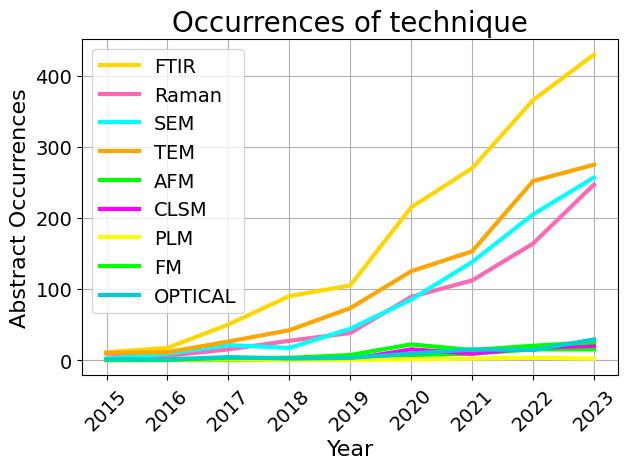

In [17]:

fig, ax = plt.subplots(1,1)
u=0
for tec in tecniques:
    ax.plot(tec_timeline[tec][0],tec_timeline[tec][1], label = tec, linewidth = 3, color = colors[u])
    u+=1

ax.set_xlabel('Year', fontsize = 16)
ax.set_ylabel('Abstract Occurrences', fontsize = 16)
ax.set_title('Occurrences of technique', fontsize = 20)
ax.set_xticks(list(range(2015, 2024)))
ax.legend(fontsize = 14)

ax.set_xticklabels(list(range(2015, 2024)),fontsize = 14,rotation=45)
plt.yticks(fontsize=14) 
ax.grid('- -')
plt.tight_layout()

plt.savefig('results/tecs_timeline.png', dpi = 200)

C:\Users\marcos220057\AppData\Local\Temp\ipykernel_12992\2885876778.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(tecniques,fontsize = 14,rotation=45)


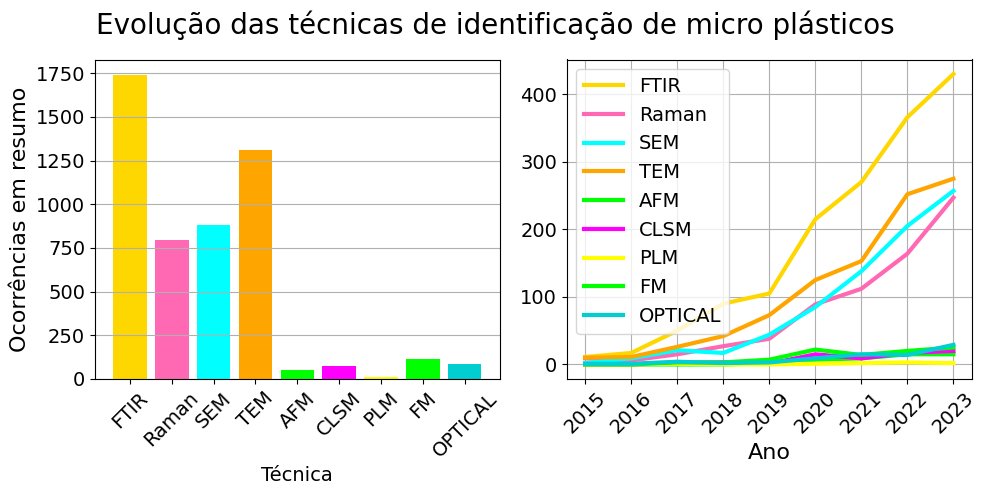

In [18]:
colors = ['#FFD700', '#FF69B4', '#00FFFF', '#FFA500', '#00FF00', '#FF00FF', '#FFFF00', '#00FF00', '#00CED1']

fig, [ax1, ax2] = plt.subplots(1,2, figsize = (10, 5))
ax1.bar(total_tec_counts.keys(), total_tec_counts.values(), color = colors)
ax1.set_xlabel('Técnica', fontsize = 14)
ax1.set_ylabel('Ocorrências em resumo', fontsize = 16)
ax1.set_xticklabels(tecniques,fontsize = 14,rotation=45)
ax1.grid('- -', axis = 'y')
ax1.tick_params(axis='y', labelsize=14)
#plt.tight_layout()
#plt.savefig('results/methods.png', dpi = 200)
u=0
for tec in tecniques:
    ax2.plot(tec_timeline[tec][0],tec_timeline[tec][1], label = tec, linewidth = 3, color = colors[u])
    u+=1

ax2.set_xlabel('Ano', fontsize = 16)
ax2.set_xticks(list(range(2015, 2024)))
ax2.legend(fontsize = 14)

ax2.set_xticklabels(list(range(2015, 2024)),fontsize = 14,rotation=45)
plt.yticks(fontsize=14) 
ax2.grid('- -')

fig.suptitle('Evolução das técnicas de identificação de micro plásticos', fontsize = 20)
plt.tight_layout() 

plt.savefig('results/tecnicas.png', dpi = 200)